In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Accessing the Dataset

In [6]:
cust = pd.read_csv('Mall_customers.csv')
cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Pre-processing

In [7]:
# Dropping CustomerID

customer = cust.drop(['CustomerID'], axis = 1)
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
# Converting categorical variables to numeric variables

cust_1 = pd.get_dummies(customer)
cust_1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [10]:
# Standardization of the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(cust_1)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [11]:
# Converting to DataFrame

X = pd.DataFrame(X, columns = cust_1.columns)
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


### Dimensionality Reduction using tSNE

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 100)

In [13]:
type (tsne)

sklearn.manifold._t_sne.TSNE

In [14]:
X_tsne = tsne.fit_transform(X)
X_tsne

D:\Coding\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 13.742989 , -10.150426 ],
       [ 14.02748  ,  -8.550854 ],
       [-10.936391 ,   3.5889792],
       [ -8.2719145,   7.8462076],
       [-11.331948 ,   4.896708 ],
       [ -8.388392 ,   7.9244766],
       [-11.59382  ,   3.1148205],
       [ -7.8547893,   8.482502 ],
       [ 13.784817 , -14.67874  ],
       [ -8.590201 ,   7.4308343],
       [ 13.600574 , -14.865328 ],
       [ -7.3235292,   8.178741 ],
       [-13.269284 ,   1.8991803],
       [ -8.454644 ,   7.977522 ],
       [ 13.482756 , -12.509849 ],
       [ 13.834272 ,  -8.55989  ],
       [-11.744753 ,   4.4423738],
       [ 13.643496 ,  -9.113793 ],
       [ 13.063439 , -13.698295 ],
       [ -7.3385396,   8.1984005],
       [ 13.1889925, -11.681824 ],
       [ 13.421404 ,  -8.824541 ],
       [-12.442577 ,   2.4455643],
       [ 13.333221 ,  -9.116437 ],
       [-13.137483 ,   2.1783068],
       [ 13.420705 ,  -8.440628 ],
       [-13.083287 ,   3.4043512],
       [ 12.964891 ,  -9.925661 ],
       [-12.49134  ,

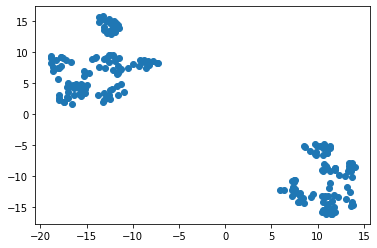

In [15]:
# Visualization

plt.scatter(X_tsne[:, 0], X_tsne[:, 1]);

**Findings**

1. Cluster formation is clear.
2. Number of clusters may be 2. We are not sure about it if there isn't much information loss.

### Clustering using GMM

In [16]:
from sklearn.mixture import GaussianMixture

n_comps = np.arange(1, 20, 1)
aic_score = []
bic_score = []
for n in n_comps:
    model = GaussianMixture(n_components = n, random_state = 100, n_init = 5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))

D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

In [17]:
print (aic_score)

[28.98033734920192, -2766.4799897414314, -2796.645539935852, -2815.0972035530413, -2818.4182407773014, -2857.305226794107, -2851.147731968497, -2854.6876091568947, -2856.0594160258897, -2849.3510747637138, -2844.513353156751, -2817.6041366812447, -2835.0398320473364, -2792.9756725151074, -2777.772644081488, -2806.727320535603, -2759.8096382744543, -2752.881188675517, -2751.286786297883]


In [18]:
print (bic_score)

[94.94668468016265, -2631.2489777129617, -2592.1498632098737, -2541.336862129554, -2475.3932346563056, -2445.0155559756026, -2369.5933964524834, -2303.8686089433727, -2235.975751114859, -2160.002745155174, -2085.900358850702, -1989.7264776776876, -1937.8975083462706, -1826.5686841165327, -1742.1009909854047, -1701.791002742011, -1585.6086557833535, -1509.4155414869074, -1438.5564744117642]


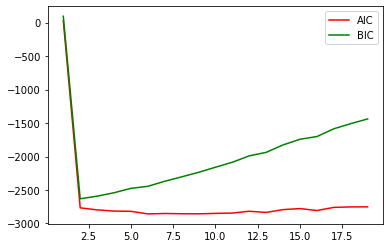

In [19]:
# Plotting the AIC and BIC Score

plt.plot(n_comps, aic_score, c = 'r', label = 'AIC')
plt.plot(n_comps, bic_score, c = 'g', label = 'BIC')
plt.legend();

**Remark**

The proposed assumption for considering the no of clusters as 2 has been validated with the AIC and BIC plot.

### Creating a GMM model with 2 clusters

In [20]:
gm = GaussianMixture(n_components = 2, random_state = 100, n_init = 5)
gm

GaussianMixture(n_components=2, n_init=5, random_state=100)

In [21]:
# Fitting the model

gm.fit(X)

GaussianMixture(n_components=2, n_init=5, random_state=100)

In [22]:
# Prediction

pred = gm.predict(X)
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [23]:
gm.means_

array([[ 0.06866767,  0.06363885, -0.0655555 , -1.12815215,  1.12815215],
       [-0.05395317, -0.05000195,  0.05150789,  0.88640526, -0.88640526]])

In [24]:
gm.covariances_

array([[[ 1.22567626e+00, -1.04066272e-01, -3.33359637e-01,
          0.00000000e+00,  0.00000000e+00],
        [-1.04066272e-01,  1.02207728e+00, -2.57837238e-02,
          0.00000000e+00,  0.00000000e+00],
        [-3.33359637e-01, -2.57837238e-02,  1.15955344e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e-06]],

       [[ 8.16068940e-01,  5.34957132e-02, -3.16092284e-01,
         -3.52170047e-33,  2.11302028e-32],
        [ 5.34957132e-02,  9.76973092e-01,  4.37956955e-02,
          2.81736038e-32, -5.63472075e-32],
        [-3.16092284e-01,  4.37956955e-02,  8.68608681e-01,
          1.40868019e-32, -1.05651014e-32],
        [-3.52170047e-33,  2.81736038e-32,  1.40868019e-32,
          1.00000000e-06, -3.69778549e-31],
        [ 2.11302028e-32, -5.63472075e-32, -1.05651014e-32,
  

In [25]:
gm.weights_

array([0.44, 0.56])

### Adding cluster labels to the DataFrame

In [26]:
customer['Label'] = pred
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [29]:
customer['Label'].value_counts(normalize = True)

1    0.56
0    0.44
Name: Label, dtype: float64

In [31]:
customer[customer['Gender'] == 'Male']

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [32]:
customer[customer['Gender'] == 'Male'][customer['Label'] == 0]

C:\Users\abina\AppData\Local\Temp\ipykernel_11000\1181558465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender'] == 'Male'][customer['Label'] == 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [33]:
customer[customer['Gender'] == 'Female'][customer['Label'] == 1]

C:\Users\abina\AppData\Local\Temp\ipykernel_11000\2372614880.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender'] == 'Female'][customer['Label'] == 1]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
5,Female,22,17,76,1
6,Female,35,18,6,1
...,...,...,...,...,...
191,Female,32,103,69,1
193,Female,38,113,91,1
194,Female,47,120,16,1
195,Female,35,120,79,1


### Insights

There are 2 segments with male customers belonging to 1 segment and the female customers to the other segment.

In [34]:
# Generating 10,000 samples

gm.sample(10000)

(array([[-0.48030421,  0.82947775,  1.35126332, -1.12793097,  1.12866637],
        [ 1.16826019,  0.17668898, -0.857043  , -1.12771699,  1.12769412],
        [ 1.15541312, -0.53360973,  0.17702385, -1.12868343,  1.12804774],
        ...,
        [-0.72225881,  0.08541431,  0.89346945,  0.88626327, -0.88632336],
        [ 0.22157311, -0.21648202, -1.40252937,  0.88728793, -0.88735674],
        [ 0.44325619,  0.15695807, -0.86917668,  0.88727025, -0.88653092]]),
 array([0, 0, 0, ..., 1, 1, 1]))